Natural language processing project

Step 1 : Load dataset 

I chose a dataset from Kaggle about Amazon reviews for books. We will explore the dataset in our notebook with the aim of conducting sentiment analysis.

In [1]:
!pip install panda


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('amazon_books_Data.csv')

Step 2: Exploratory data analysis

In [4]:
data.columns

Index(['Unnamed: 0', 'market_place', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'Sentiment_books',
       'review_month', 'review_day', 'review_year'],
      dtype='object')

In [5]:
data.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_books,review_month,review_day,review_year
0,0,"""US""","""25933450""","""RJOVP071AVAJO""","""0439873800""","""84656342""","""There Was an Old Lady Who Swallowed a Shell!""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""I love it and so does my students!""",2015-08-31,positive,August,Monday,2015
1,1,"""US""","""1801372""","""R1ORGBETCDW3AI""","""1623953553""","""729938122""","""I Saw a Friend""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Please buy ""I Saw a Friend""! Your children wi...","""My wife and I ordered 2 books and gave them a...",2015-08-31,positive,August,Monday,2015
2,2,"""US""","""5782091""","""R7TNRFQAOUTX5""","""142151981X""","""678139048""","""Black Lagoon, Vol. 6""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Shipped fast.""","""Great book just like all the others in the se...",2015-08-31,positive,August,Monday,2015
3,3,"""US""","""32715830""","""R2GANXKDIFZ6OI""","""014241543X""","""712432151""","""If I Stay""","""Books""",1,0,0,0 \t(N),0 \t(N),"""Five Stars""","""So beautiful""",2015-08-31,positive,August,Monday,2015
4,4,"""US""","""14005703""","""R2NYB6C3R8LVN6""","""1604600527""","""800572372""","""Stars 'N Strips Forever""","""Books""",1,2,2,0 \t(N),1 \t(Y),"""Five Stars""","""Enjoyed the author's story and his quilts are...",2015-08-31,positive,August,Monday,2015


In [6]:
data = data.drop('Unnamed: 0', axis=1)
print(data.head())

  market_place customer_id         review_id    product_id product_parent  \
0         "US"  "25933450"   "RJOVP071AVAJO"  "0439873800"     "84656342"   
1         "US"   "1801372"  "R1ORGBETCDW3AI"  "1623953553"    "729938122"   
2         "US"   "5782091"   "R7TNRFQAOUTX5"  "142151981X"    "678139048"   
3         "US"  "32715830"  "R2GANXKDIFZ6OI"  "014241543X"    "712432151"   
4         "US"  "14005703"  "R2NYB6C3R8LVN6"  "1604600527"    "800572372"   

                                    product_title product_category  \
0  "There Was an Old Lady Who Swallowed a Shell!"          "Books"   
1                                "I Saw a Friend"          "Books"   
2                          "Black Lagoon, Vol. 6"          "Books"   
3                                     "If I Stay"          "Books"   
4                       "Stars 'N Strips Forever"          "Books"   

   star_rating  helpful_votes  total_votes     vine verified_purchase  \
0            1              0            0 

We can notice the columns that may be interesting to use in our study: star_rating, review_body, Sentiment_books

In [7]:
data['star_rating'].unique()

array([1, 0], dtype=int64)

In [8]:

print(pd.concat([data['star_rating'], data['Sentiment_books']], axis=1))

    star_rating Sentiment_books
0             1        positive
1             1        positive
2             1        positive
3             1        positive
4             1        positive
..          ...             ...
95            1        positive
96            0        negaitve
97            1        positive
98            1        positive
99            1        positive

[100 rows x 2 columns]


We can see that when 'star_rating' is 1, it corresponds to 'positive', and when 'star_rating' is 0, it corresponds to 'negaitive'.

In [9]:
# What are the sentiment possible here for each review
unique_values = data['Sentiment_books'].unique()


print(unique_values)

['positive' 'negaitve']


We noticed an issue in the writting of negative 

In [10]:
# Must replace the value from 'negaitve' to 'negative' in the columns 'Sentiment_books'
data['Sentiment_books'].replace('negaitve', 'negative', inplace=True)

unique_values_updated = data['Sentiment_books'].unique()
print(unique_values_updated)

['positive' 'negative']


In [11]:
class_labels = ["negative", "positive"]
category_orders = {"Sentiment_books": class_labels}

In [12]:

import plotly.express as px
# Using the value_counts function to obtain the class distribution
class_distribution = data['Sentiment_books'].value_counts()

print(class_distribution)

fig = px.histogram(data, x='Sentiment_books', title='Distribution des classes de Sentiment')
fig.show()


positive    84
negative    16
Name: Sentiment_books, dtype: int64


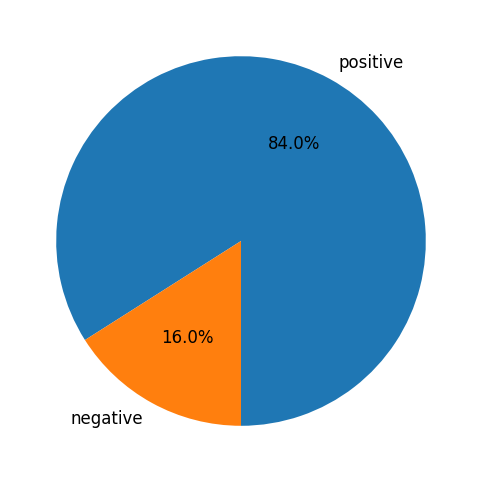

In [17]:
# Class distribution
class_distribution = data['Sentiment_books'].value_counts()

# Plot a pie chart for the class distribution
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
class_distribution.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

plt.show()


In the 'Sentiment_books' category, there are 84 instances labeled as 'positive' and 16 instances labeled as 'negative'.

C:\Users\Hp\AppData\Local\Temp\ipykernel_1044\2884795936.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Hp\AppData\Local\Temp\ipykernel_1044\2884795936.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




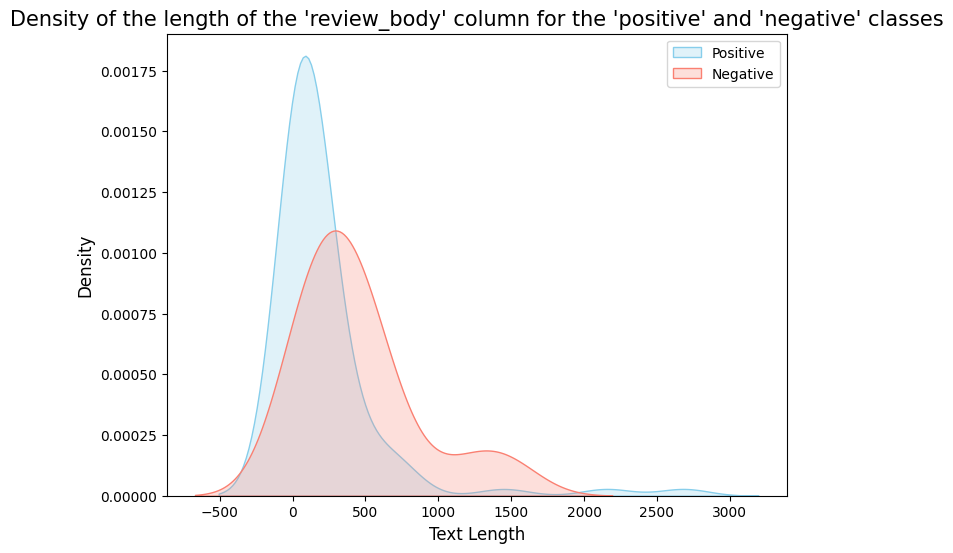

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
# Use seaborn to plot the density based on the length of the 'review_body' column for the 'positive' class
sns.kdeplot(data=data[data['Sentiment_books'] == 'positive']['review_body'].str.len(), 
           label='Positive', shade=True, color='skyblue')

# Use seaborn to plot the density based on the length of the 'review_body' column for the 'negative' class.
sns.kdeplot(data=data[data['Sentiment_books'] == 'negative']['review_body'].str.len(), 
           label='Negative', shade=True, color='salmon')

plt.title("Density of the length of the 'review_body' column for the 'positive' and 'negative' classes", fontsize=15)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()

plt.show()


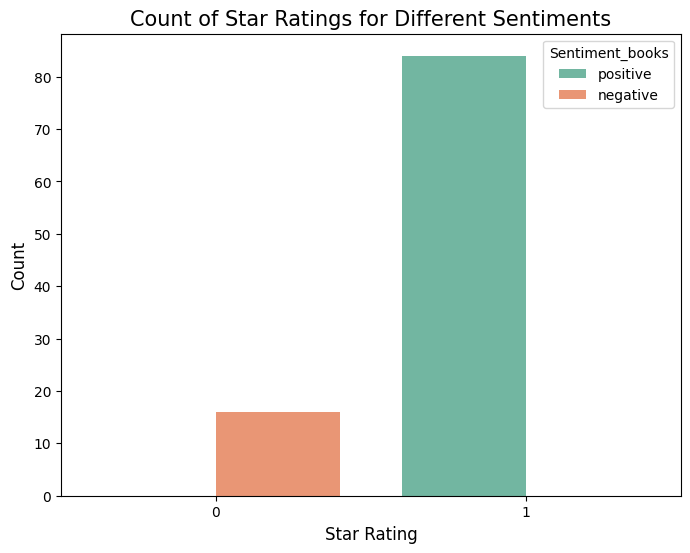

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
# Use seaborn to create a count plot of the 'star_rating' for both 'positive' and 'negative' classes
sns.countplot(x='star_rating', hue='Sentiment_books', data=data, palette='Set2')

plt.title('Count of Star Ratings for Different Sentiments', fontsize=15)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_1044\1767143528.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Hp\AppData\Local\Temp\ipykernel_1044\1767143528.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




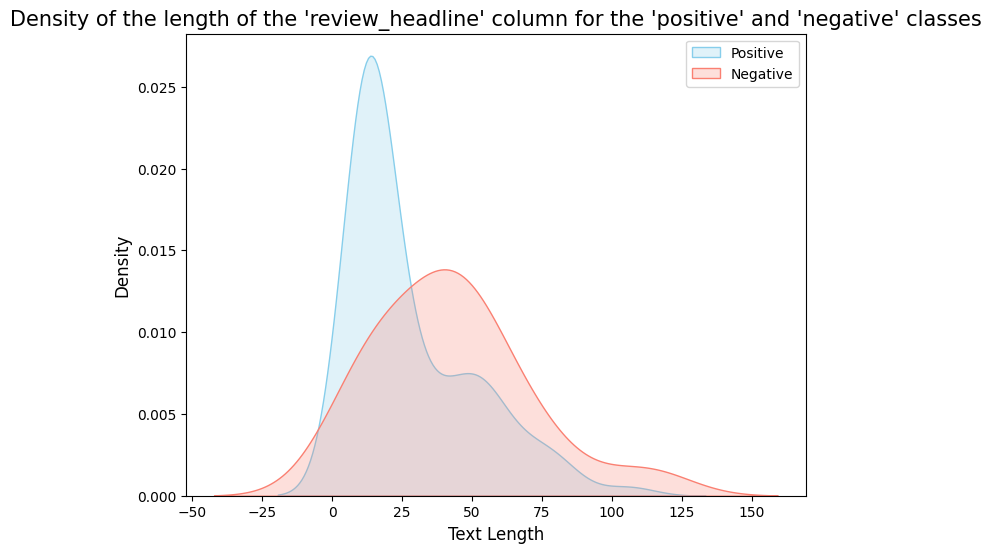

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
# Use seaborn to plot the density based on the length of the 'review_body' column for the 'positive' class
sns.kdeplot(data=data[data['Sentiment_books'] == 'positive']['review_headline'].str.len(), 
           label='Positive', shade=True, color='skyblue')

# Use seaborn to plot the density based on the length of the 'review_body' column for the 'negative' class.
sns.kdeplot(data=data[data['Sentiment_books'] == 'negative']['review_headline'].str.len(), 
           label='Negative', shade=True, color='salmon')

plt.title("Density of the length of the 'review_headline' column for the 'positive' and 'negative' classes", fontsize=15)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()

plt.show()


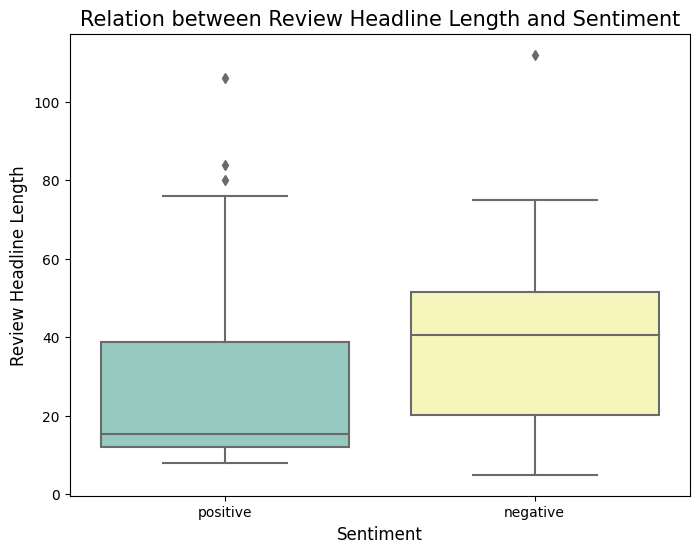

In [22]:
plt.figure(figsize=(8,6))
# Use seaborn to create a box plot of the 'review_headline' length for both 'positive' and 'negative' sentiments
sns.boxplot(x='Sentiment_books', y=data['review_headline'].str.len(), data=data, palette='Set3')

plt.title('Relation between Review Headline Length and Sentiment', fontsize=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Headline Length', fontsize=12)

plt.show()


Now we are going to try the preprocessing in order to explore more the dataset. 

We are going to build a preprocessing pipeline in an other notebook.

In [23]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
import nltk

In [25]:
data['review_body']

0                  "I love it and so does my students!"
1     "My wife and I ordered 2 books and gave them a...
2     "Great book just like all the others in the se...
3                                        "So beautiful"
4     "Enjoyed the author's story and his quilts are...
                            ...                        
95    "We always talk about hygiene here and this re...
96    "(Source: I received a digital copy of this bo...
97    "You'll find yourself transported back to war-...
98    "Story that has been too long covered up. Show...
99    "I loved this book!<br /><br />Maya is such an...
Name: review_body, Length: 100, dtype: object

Convert everything to lowercase

In [26]:
def lower(text):
    return text.lower()

In [27]:
data['review_body']=data['review_body'].apply(lower)
data['review_body']

0                  "i love it and so does my students!"
1     "my wife and i ordered 2 books and gave them a...
2     "great book just like all the others in the se...
3                                        "so beautiful"
4     "enjoyed the author's story and his quilts are...
                            ...                        
95    "we always talk about hygiene here and this re...
96    "(source: i received a digital copy of this bo...
97    "you'll find yourself transported back to war-...
98    "story that has been too long covered up. show...
99    "i loved this book!<br /><br />maya is such an...
Name: review_body, Length: 100, dtype: object

Get rid of the punctuaction

In [29]:
import re
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '',text)

In [30]:
data['review_body']=data['review_body'].apply(remove_punctuation)
data['review_body']

0                     i love it and so does my students
1     my wife and i ordered 2 books and gave them as...
2     great book just like all the others in the series
3                                          so beautiful
4     enjoyed the authors story and his quilts are i...
                            ...                        
95    we always talk about hygiene here and this rea...
96    source i received a digital copy of this book ...
97    youll find yourself transported back to wartim...
98    story that has been too long covered up shows ...
99    i loved this bookbr br maya is such an interes...
Name: review_body, Length: 100, dtype: object

Tokenization

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
def tokenization(text):
    return nltk.word_tokenize(text)

In [33]:

data['tokenised_review']=data['review_body'].apply(tokenization)
data['tokenised_review']

0            [i, love, it, and, so, does, my, students]
1     [my, wife, and, i, ordered, 2, books, and, gav...
2     [great, book, just, like, all, the, others, in...
3                                       [so, beautiful]
4     [enjoyed, the, authors, story, and, his, quilt...
                            ...                        
95    [we, always, talk, about, hygiene, here, and, ...
96    [source, i, received, a, digital, copy, of, th...
97    [youll, find, yourself, transported, back, to,...
98    [story, that, has, been, too, long, covered, u...
99    [i, loved, this, bookbr, br, maya, is, such, a...
Name: tokenised_review, Length: 100, dtype: object

Stemming : reduce to canonique form 

In [34]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [35]:

data['tokenised_review'] = data['tokenised_review'].apply(stemming)

In [36]:
data['tokenised_review']

0              [i, love, it, and, so, doe, my, student]
1     [my, wife, and, i, order, 2, book, and, gave, ...
2     [great, book, just, like, all, the, other, in,...
3                                          [so, beauti]
4     [enjoy, the, author, stori, and, hi, quilt, ar...
                            ...                        
95    [we, alway, talk, about, hygien, here, and, th...
96    [sourc, i, receiv, a, digit, copi, of, thi, bo...
97    [youll, find, yourself, transport, back, to, w...
98    [stori, that, ha, been, too, long, cover, up, ...
99    [i, love, thi, bookbr, br, maya, is, such, an,...
Name: tokenised_review, Length: 100, dtype: object

In [37]:
from nltk.corpus import stopwords

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
data['tokenised_review'] = data['tokenised_review'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
data['tokenised_review']

0                                  [love, doe, student]
1     [wife, order, 2, book, gave, presentson, frien...
2                             [great, book, like, seri]
3                                              [beauti]
4     [enjoy, author, stori, hi, quilt, incred, plan...
                            ...                        
95    [alway, talk, hygien, thi, realli, made, think...
96    [sourc, receiv, digit, copi, thi, book, free, ...
97    [youll, find, transport, back, wartim, forties...
98    [stori, ha, long, cover, show, true, side, top...
99    [love, thi, bookbr, br, maya, interest, charac...
Name: tokenised_review, Length: 100, dtype: object

It was to test all the preprocessed step before putting it in a python file named preprocessing_pipeline.py

Generating word clouds to visualize the most frequent words in both the positive and negative reviews

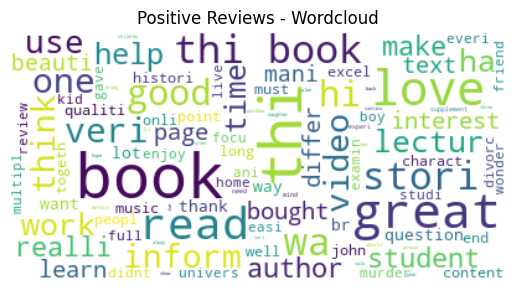

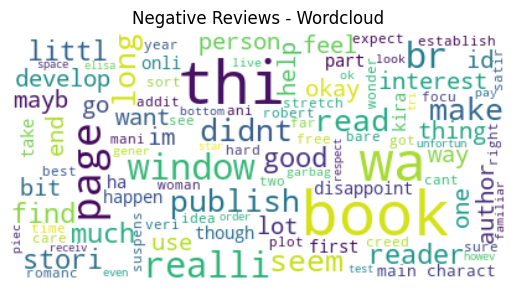

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate lists to string must be done to generate the wordcloud 
data['tokenised_review'] = data['tokenised_review'].apply(lambda x: ' '.join(x))

# Wordcloud with positive reviews
positive_reviews = data['tokenised_review'][data["Sentiment_books"] == 'positive']
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(positive_reviews))

plt.figure()
plt.title("Positive Reviews - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative reviews
negative_reviews = data['tokenised_review'][data["Sentiment_books"] == 'negative']
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(negative_reviews))

plt.figure()
plt.title("Negative Reviews - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
